## Demo for learning field dependent aberration from bead data

##### Setup environment

In [1]:
import sys
sys.path.append("..")
from psflearning.psflearninglib import psflearninglib
from psflearning import io
from psflearning.makeplots import *
import tensorflow as tf
gpus = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(gpus[0], True)

##### Create psflearning object and load the config file
$\small\color{skyblue}{\mathrm{basefile}}$: config file with all parameters  
$\small\color{skyblue}{\mathrm{sysfile}}$: config file with microscope specific parameters  
For advanced user, pass in base file only as below to interact with all parameters:   
```python
    L.param = io.param.combine('config_base')
```

In [2]:
L = psflearninglib()
L.param = io.param.combine('config_base',psftype='FD',channeltype='1ch',sysfile='SEQ')
#L.param = io.param.load('../config/config_zernike_FD.yaml').Params

##### Edit user defined parameters

In [3]:
L.param.datapath = r'Y:\Projects\DNA-PAINT\Data\TU-DELFT DNAP\MT Data 11-17-23\Bead Data with astigmatism/'
L.param.savename = L.param.datapath + 'psfmodel'
L.param.keyword = 'zstack' # keyword for your data file
L.param.subfolder = 'zstack' # keyword for subfolder name if each data file is saved in a individual folder, set to '' if no subfolder
L.param.gain = 0.47
L.param.ccd_offset = 100
L.param.FOV.z_step = 1  
L.param.pixel_size.z = 0.1 # micron, equal to z_step*stepsize_of_the_data
L.param.roi.max_bead_number = 200 # lower this number if out of memory 
L.param.roi.peak_height = 0.2
L.param.batch_size = 30
L.param.option.model.symmetric_mag = False
L.param.loss_weight.smooth = 0.1
L.param.iteration=300
L.param.format = '.mat'
L.param.PSFtype = 'zernike_vector_FD'
L.param.option.model.division = 32
L.param.roi.roi_size = [31,31]
L.param.rej_threshold.mse = 2

In [5]:
L.param.swapxy

True

##### Start learning

In [4]:
images = L.load_data()

Y:\Projects\DNA-PAINT\Data\TU-DELFT DNAP\MT Data 11-17-23\Bead Data with astigmatism\zstack1\zstack.mat
Y:\Projects\DNA-PAINT\Data\TU-DELFT DNAP\MT Data 11-17-23\Bead Data with astigmatism\zstack2\zstack.mat
Y:\Projects\DNA-PAINT\Data\TU-DELFT DNAP\MT Data 11-17-23\Bead Data with astigmatism\zstack3\zstack.mat
(3, 21, 1024, 1024)


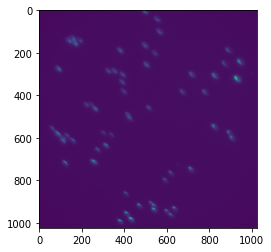

In [9]:
plt.imshow(images[0,0])

In [10]:
images = L.load_data()
L.getpsfclass()
dataobj = L.prep_data(images)
psfobj,fitter = L.learn_psf(dataobj,time=0)
loc_FD = L.localize_FD(fitter) # optional step, for validating each PSF model
resfile = L.save_result(psfobj,dataobj,fitter)

Y:\Projects\DNA-PAINT\Data\TU-DELFT DNAP\MT Data 11-17-23\Bead Data with astigmatism\zstack1\zstack.mat
Y:\Projects\DNA-PAINT\Data\TU-DELFT DNAP\MT Data 11-17-23\Bead Data with astigmatism\zstack2\zstack.mat
Y:\Projects\DNA-PAINT\Data\TU-DELFT DNAP\MT Data 11-17-23\Bead Data with astigmatism\zstack3\zstack.mat
(3, 21, 1024, 1024)
rois shape channel : (99, 21, 31, 31)


3/6: learning: 113/350 [08:05s]  4.29s/it, current loss: 1.20769, total time: 485.19s
4/6: calculating spline coefficients: 1/1 [00:02s]  2.04s/it total time: 487.23s
5/6: localization: 5/5 [00:00s]  6.26it/s total time: 488.02s


outlier id: [ 4  5 13 19 34 39 55 62 72 83]
rois shape channel : (89, 21, 31, 31)


3/6: learning: 356/? [19:00s]  3.20s/it, current loss: 0.93868, total time: 1628.70s  
4/6: calculating spline coefficients: 1/1 [00:01s]  1.97s/it total time: 1630.66s
5/6: localization: 5/5 [00:00s]  6.25it/s total time: 1631.46s
4/6: calculating spline coefficients: 1/1 [00:01s]  1.62s/it total time: 1.62s
5/6: localization: 4/4 [00:00s]  9.62it/s total time: 2.03s
4/6: calculating spline coefficients: 1/1 [00:01s]  1.64s/it total time: 1.64s
5/6: localization: 4/4 [00:00s]  9.83it/s total time: 2.04s
4/6: calculating spline coefficients: 1/1 [00:01s]  1.70s/it total time: 1.69s
5/6: localization: 4/4 [00:00s]  8.20it/s total time: 2.18s
4/6: calculating spline coefficients: 1/1 [00:01s]  1.66s/it total time: 1.66s
5/6: localization: 4/4 [00:00s] 12.96it/s total time: 1.96s
4/6: calculating spline coefficients: 1/1 [00:01s]  1.64s/it total time: 1.64s
5/6: localization: 4/4 [00:00s] 14.73it/s total time: 1.91s
4/6: calculating spline coefficients: 1/1 [00:01s]  1.63s/it total time: 

##### Show results

In [11]:
f,p = io.h5.load(resfile) # load result file

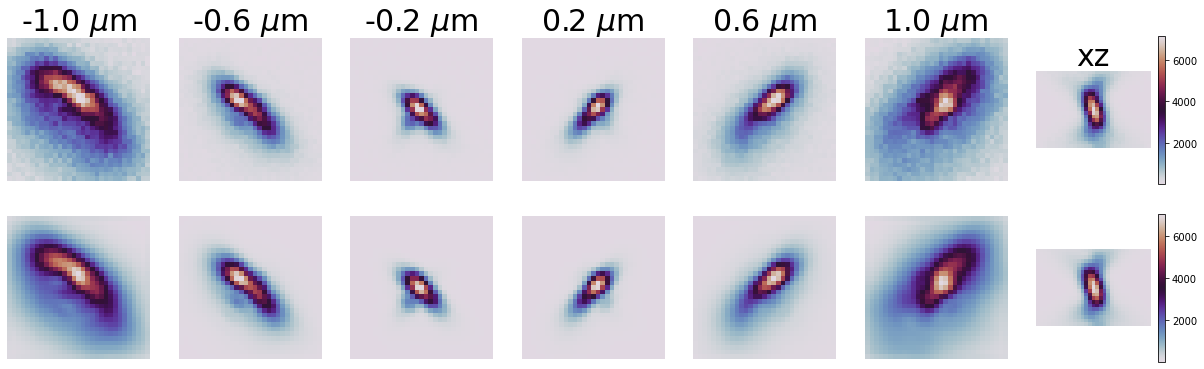

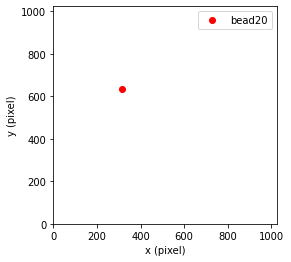

In [23]:
showpsfvsdata(f,p,index=20)

In [14]:
f.res.sigma

array([0.5477565 , 0.41531584], dtype=float32)

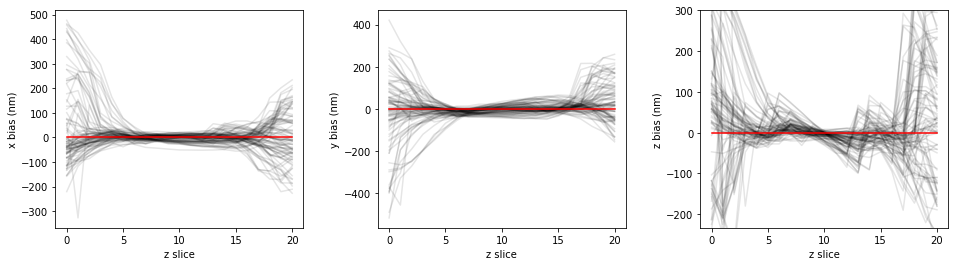

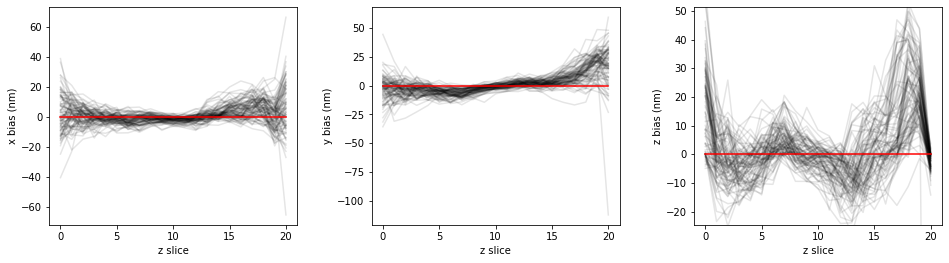

In [15]:
showlocalization(f,p)

##### Optional plots

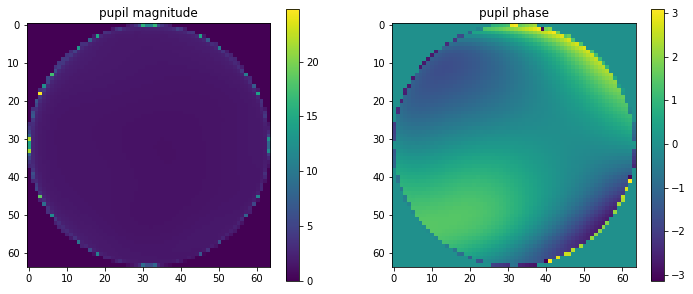

In [24]:
showpupil(f,p,index=30)

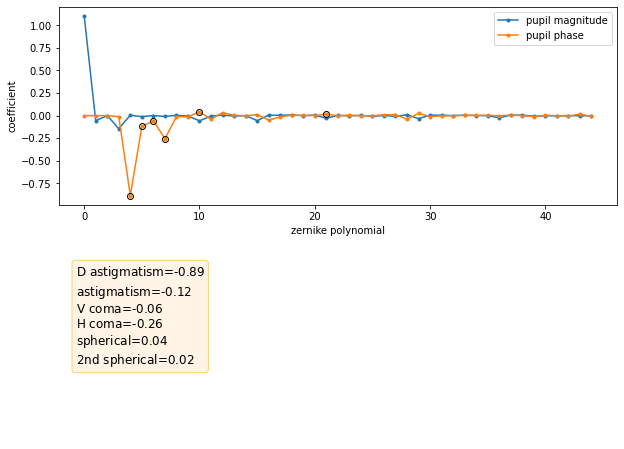

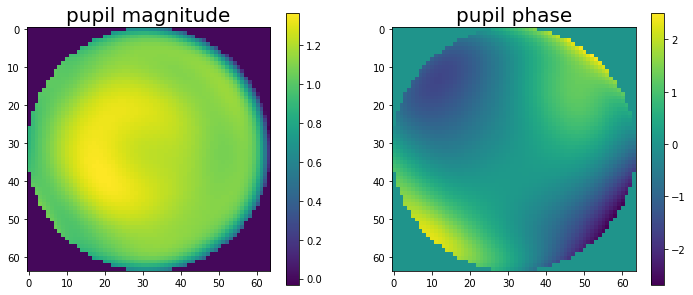

In [25]:
showzernike(f,p,index=10)

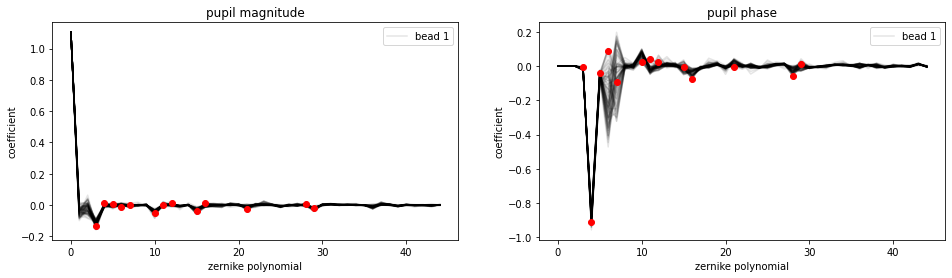

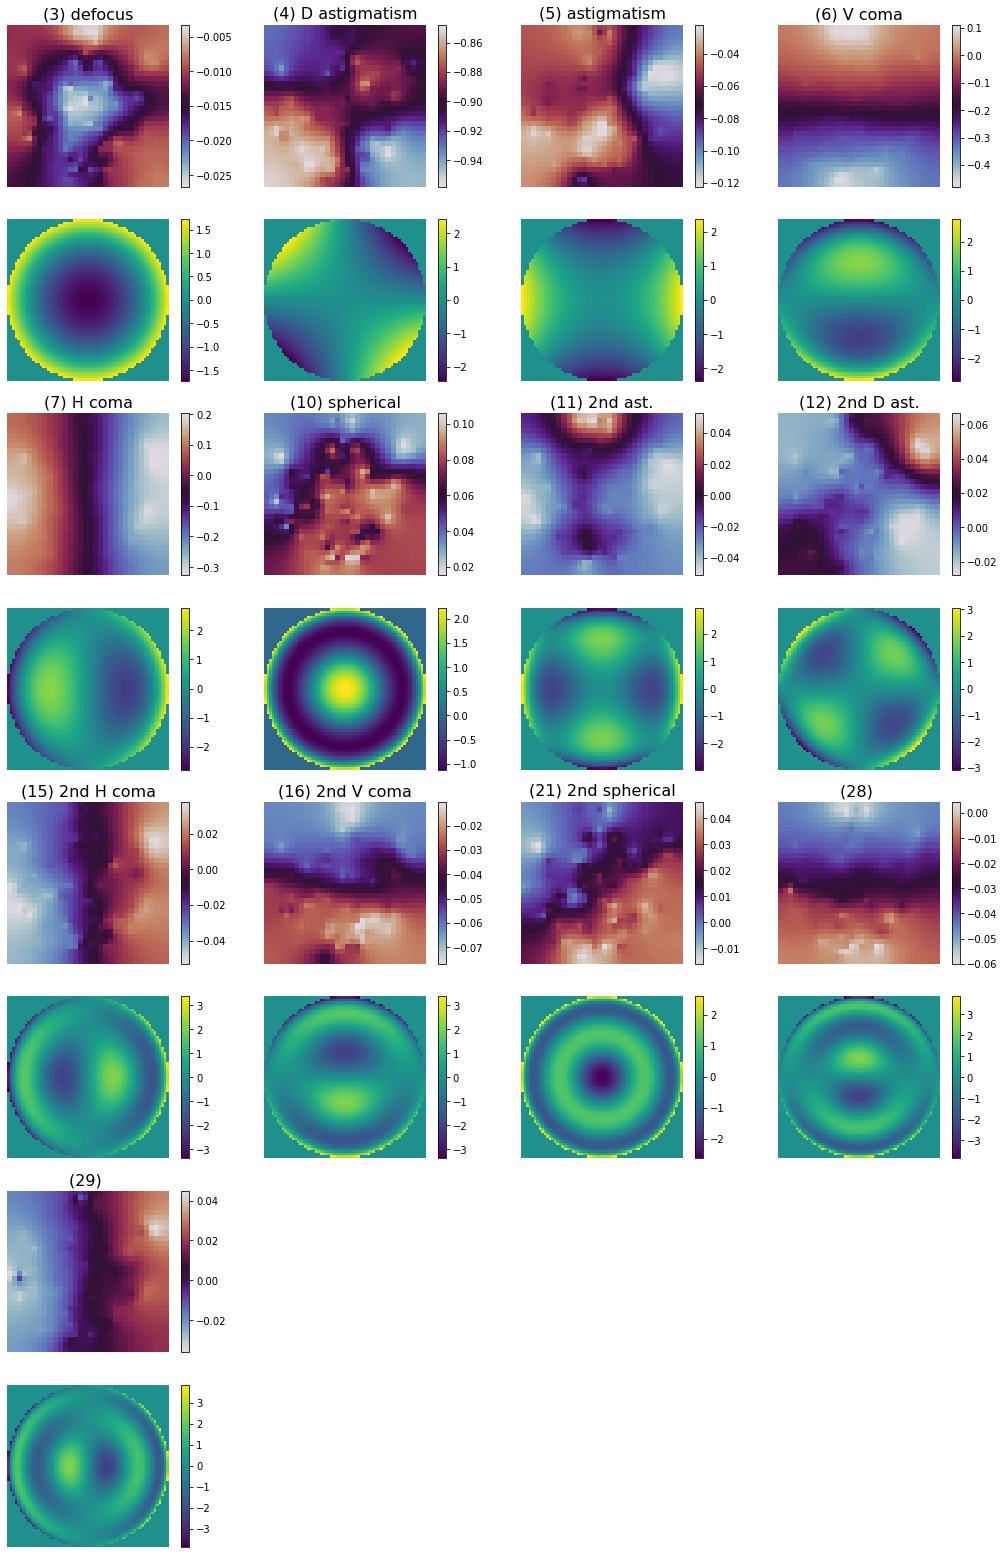

In [18]:
showzernikemap(f,p,index = [3,4,5,6,7,10,11,12,15,16,21,28,29])

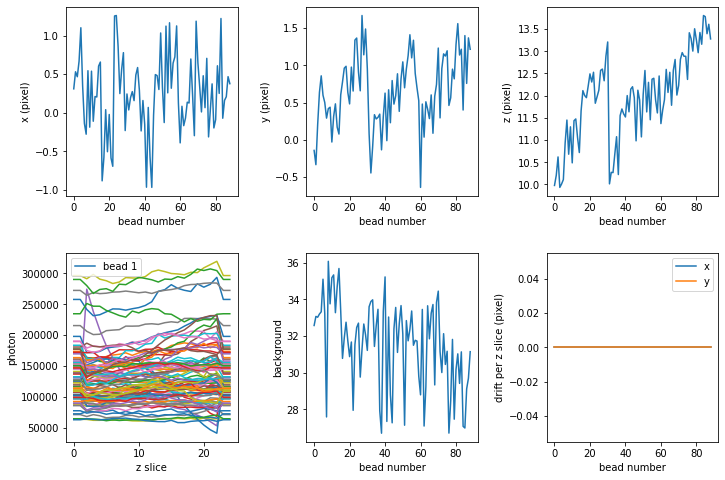

In [19]:
showlearnedparam(f,p)

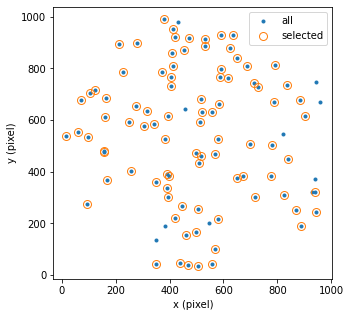

In [20]:
showcoord(f,p)

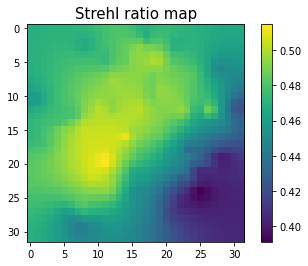

In [21]:
strehlratio = L.calstrehlratio(f)

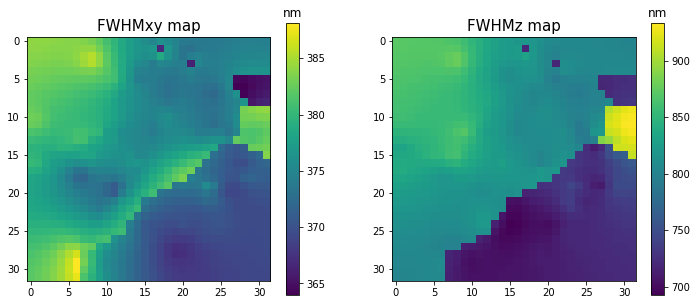

In [22]:
fwhmx,fwhmy,fwhmz = L.calfwhm(f)